<a href="https://colab.research.google.com/github/thekkanathashish95/Projects/blob/master/Stock_Analysis%20-%20US%20Carmakers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Price Analysis of the biggest 4 US Carmakers.

Inspired by: https://www.youtube.com/watch?v=57qAxRV577c

In [148]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [149]:
start=datetime.datetime(2019,1,1)
end=datetime.datetime(2020,9,30)

In [150]:
google=web.DataReader('GOOGL','yahoo', start=start, end=end)

In [151]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1060.790039,1025.280029,1027.199951,1054.680054,1593400,1054.680054
2019-01-03,1066.260010,1022.369995,1050.670044,1025.469971,2098000,1025.469971
2019-01-04,1080.000000,1036.859985,1042.560059,1078.069946,2301100,1078.069946
2019-01-07,1082.699951,1062.640015,1080.969971,1075.920044,2372300,1075.920044
2019-01-08,1093.349976,1068.349976,1086.000000,1085.369995,1770700,1085.369995


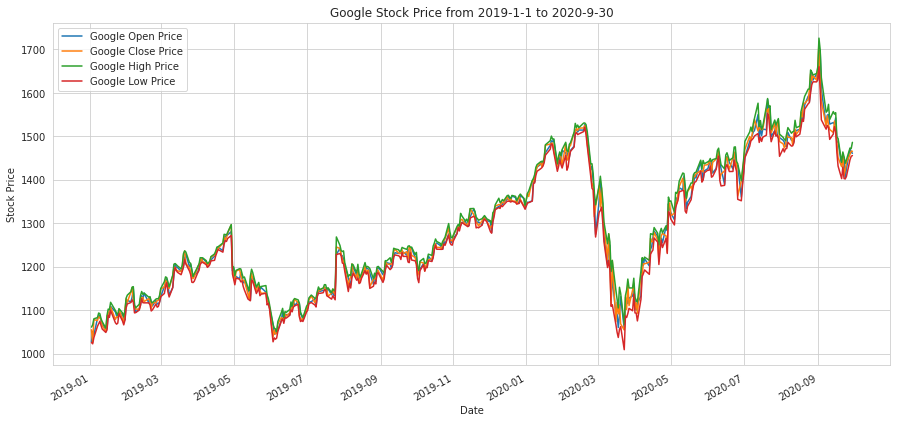

In [152]:
google['Open'].plot(label="Google Open Price", figsize=(15,7))
google['Close'].plot(label="Google Close Price")
google['High'].plot(label="Google High Price")
google['Low'].plot(label="Google Low Price")
plt.title("Google Stock Price from 2019-1-1 to 2020-9-30")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

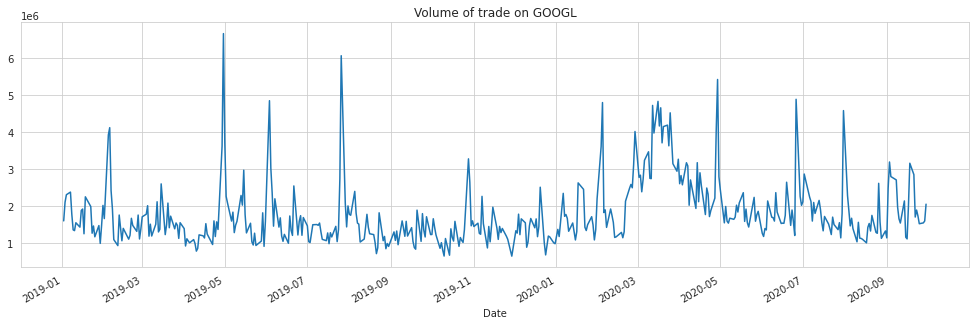

In [153]:
google['Volume'].plot(figsize=(17,5))
plt.title("Volume of trade on GOOGL")
plt.show()

##Stock Analysis - Tesla VS Ford VS General Motors VS Honda

In [154]:
start=datetime.datetime(2010,1,1)
end=datetime.datetime(2020,9,30)

###Downloading Data

In [155]:
tesla = web.DataReader('TSLA', 'yahoo', start, end)
ford = web.DataReader('F', 'yahoo', start, end)
gm = web.DataReader('GM', 'yahoo', start, end)
honda = web.DataReader('HMC', 'yahoo', start, end)

###Plotting Opening Price

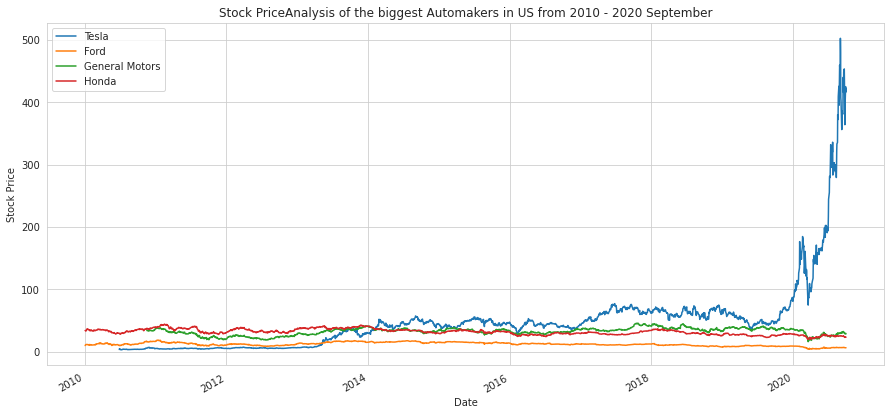

In [156]:
tesla["Open"].plot(label="Tesla", figsize=(15,7)) 
ford["Open"].plot(label="Ford") 
gm["Open"].plot(label="General Motors") 
honda["Open"].plot(label="Honda") 
plt.ylabel("Stock Price")
plt.legend()
plt.title("Stock PriceAnalysis of the biggest Automakers in US from 2010 - 2020 September")
plt.show()

As can be observed from the plot, Tesla saw an exponential rise in Share price from around March of 2020, while the rest of the car makers does not show any significant change in their share price over the last 10 years

###Plotting Volume Traded

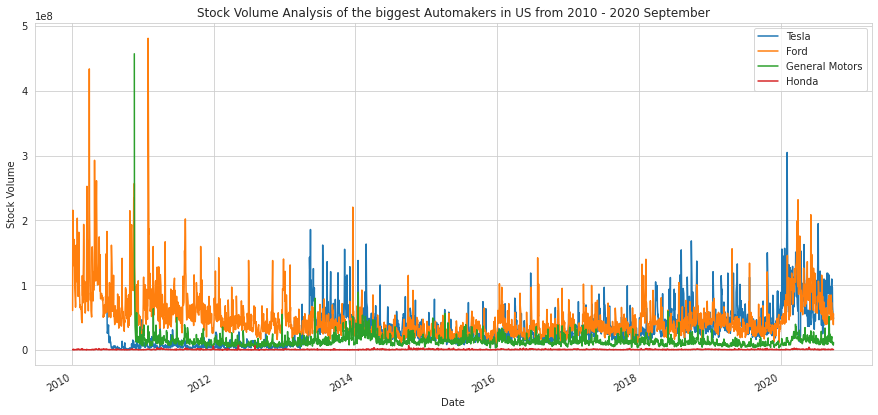

In [157]:
tesla["Volume"].plot(label="Tesla", figsize=(15,7)) 
ford["Volume"].plot(label="Ford") 
gm["Volume"].plot(label="General Motors") 
honda["Volume"].plot(label="Honda") 
plt.ylabel("Stock Volume")
plt.legend()
plt.title("Stock Volume Analysis of the biggest Automakers in US from 2010 - 2020 September")
plt.show()

As can be observed, Ford and Tesla lead interms of the volume of shares in trade. Honda ranks the lowest with a minimal volume of shares in trade.

Let us analyze the spike point dates for these stocks,

In [158]:
ford.iloc[[ford['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-28,17.879999,15.98,17.790001,16.27,480879500.0,10.980063


The high trading volume was due to fords much less than expected 4th quarter earnings announced this day. Find more information [here](https://money.cnn.com/2011/01/28/news/companies/ford_earnings/index.htm).

In [159]:
tesla.iloc[[tesla['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-04,193.798004,166.776001,176.591995,177.412003,304694000.0,177.412003


Was due to a higher than expected 4th quarter earnings report. Find more information [here](https://www.forbes.com/sites/sergeiklebnikov/2020/02/03/heres-why-tesla-stock-just-surged-to-a-record-780-per-share/#46d463145ee7).

In [160]:
honda.iloc[[honda['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-08,33.740002,33.360001,33.68,33.669998,7276300.0,26.08379


In [161]:
gm.iloc[[gm['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-11-18,35.990002,33.889999,35.0,34.189999,457044300.0,26.155519


This was the day of IPO for General Motors. Find more information [here](https://media.gm.com/media/us/en/gm/news.detail.html/content/Pages/news/us/en/2010/Nov/1118_advisory_nyse.html).

###Zooming in on the peak volume stage

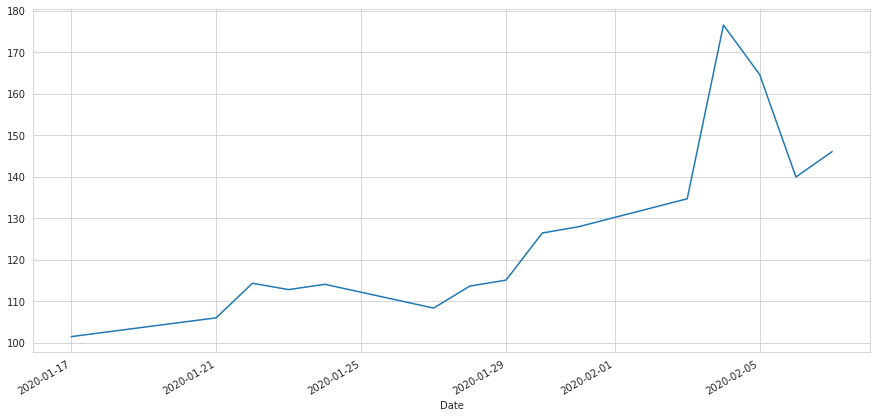

In [162]:
tesla.iloc[2405:2420]["Open"].plot(figsize=(15,7))

##Understanding total value in Trade

In [163]:
tesla["Total Traded"]=tesla["Open"]*tesla["Volume"]
gm["Total Traded"]=gm["Open"]*gm["Volume"]
ford["Total Traded"]=ford["Open"]*ford["Volume"]
honda["Total Traded"]=honda["Open"]*honda["Volume"]

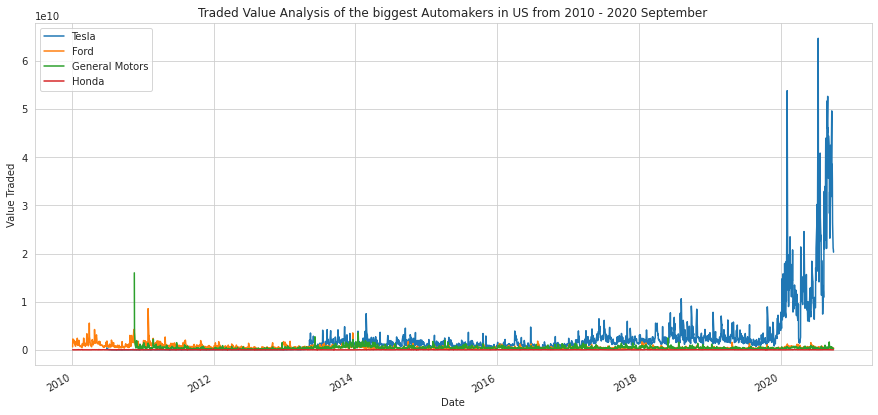

In [164]:
tesla["Total Traded"].plot(label="Tesla", figsize=(15,7)) 
ford["Total Traded"].plot(label="Ford") 
gm["Total Traded"].plot(label="General Motors") 
honda["Total Traded"].plot(label="Honda") 
plt.ylabel("Value Traded")
plt.legend()
plt.title("Traded Value Analysis of the biggest Automakers in US from 2010 - 2020 September")
plt.show()

In [165]:
tesla["Total Traded"].argmax()

2526

In [166]:
tesla.iloc[[tesla["Total Traded"].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-07-13,358.997986,294.221985,331.799988,299.411987,194927000.0,299.411987,6.467678e+10


Shares of Tesla surged as much as 16% Monday to $1,794.99 USD, a fresh all-time high for the automaker, as it announced a date for its upcoming Battery Day and speculation increased that it may soon be included in the S&P 500 index. More Information [here](https://teslanorth.com/2020/07/13/tesla-surge/).

##Moving Averages

Moving average helps by making our data more reliable and robust by stabilizing the noise inside the time series data

[]

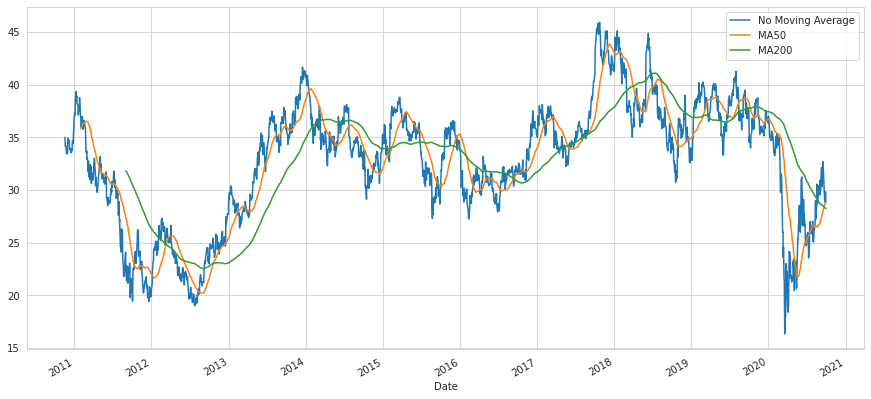

In [167]:
gm["Open"].plot(label="No Moving Average",figsize=(15,7))
gm["MA50"]=gm["Open"].rolling(50).mean()
gm["MA50"].plot(label="MA50")
gm["MA200"]=gm["Open"].rolling(200).mean()
gm["MA200"].plot(label="MA200")
plt.legend()
plt.plot()

Learn about ARIMA, ACF and Exponentially Weighted Moving Average

##Correlation & Scatter Matrix

In [168]:
from pandas.plotting import scatter_matrix
import pandas as pd

In [169]:
car_comp=pd.concat([tesla["Open"], gm["Open"], ford["Open"], honda["Open"]], axis=1)
car_comp.columns = ["Tesla Open", "GM Open", "Ford Open", "Honda Open"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f914a42b7f0>,
      dtype=object)

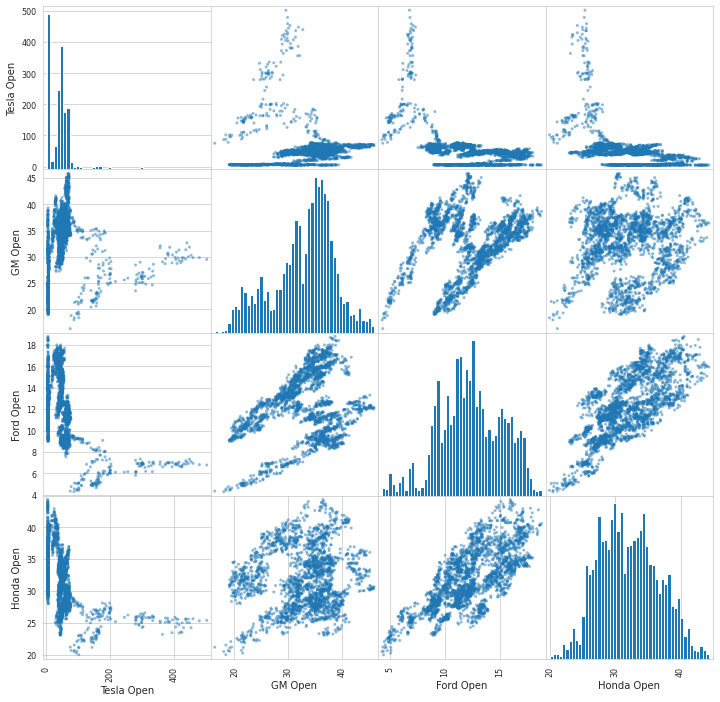

In [170]:
scatter_matrix(car_comp, figsize=(12,12), hist_kwds={'bins':50})

As can be observed, the only correlation that visibly exist can be between Ford & Honda.

##Candlestick Charts

In [171]:
!pip install mpl_finance
from mpl_finance import candlestick_ohlc

In [172]:
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [173]:
ford_reset= ford.loc['2012-01':'2012-01'].reset_index()

In [174]:
ford_reset["date_ax"]=ford_reset["Date"].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax','Open','High','Low','Close']].values]

In [175]:
mondays=WeekdayLocator(MONDAY)
alldays=DayLocator()
weekFormatter=DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

([<matplotlib.lines.Line2D at 0x7f9149fd4b00>,
  <matplotlib.patches.Rectangle at 0x7f914a15fba8>])

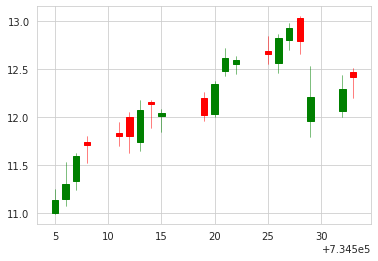

In [176]:
fig, ax = plt.subplots()
candlestick_ohlc(ax,ford_values, width=0.6, colorup='g')

##Daily Percentage Change

Formula --> rt = (pt/pt-1) - 1

This formula is helpful in analyzing the volatility. 

In [177]:
tesla["return"]=(tesla['Close']-tesla['Close'].shift(1)) - 1 

In [178]:
ford["return"]=(ford['Close']-ford['Close'].shift(1)) - 1 
gm["return"]=(gm['Close']-gm['Close'].shift(1)) - 1 
honda["return"]=(honda['Close']-honda['Close'].shift(1)) - 1 

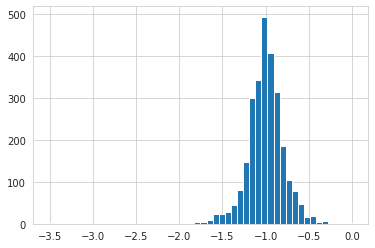

In [179]:
ford['return'].hist(bins=50)

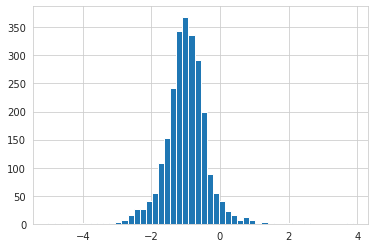

In [180]:
gm['return'].hist(bins=50)

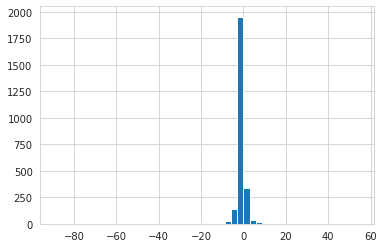

In [181]:
tesla['return'].hist(bins=50)

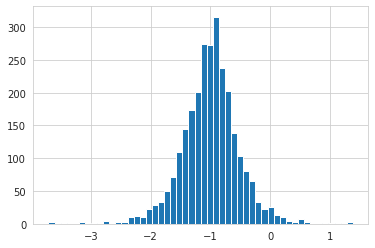

In [182]:
honda['return'].hist(bins=50)

###Combining Plots

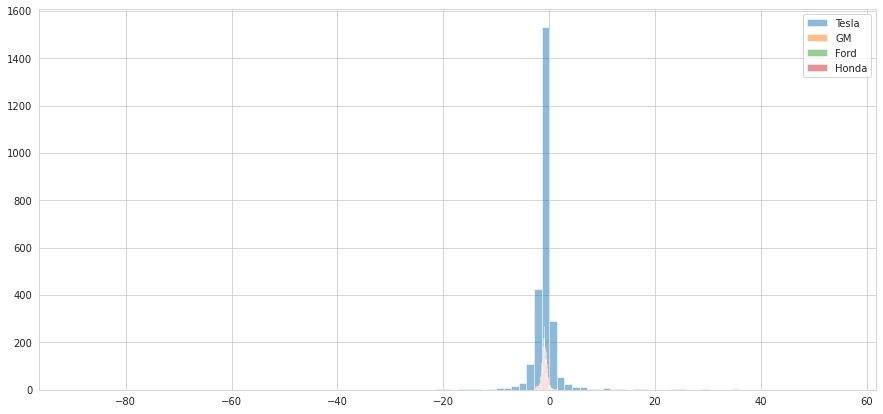

In [183]:
tesla['return'].hist(bins=100, label="Tesla", alpha=0.5, figsize=(15,7))
gm['return'].hist(bins=100, label="GM", alpha=0.5)
ford['return'].hist(bins=100, label="Ford", alpha=0.5)
honda['return'].hist(bins=100, label="Honda", alpha=0.5)
plt.legend()

As can be observed from the plot, Tesla's distribution is wider than GM, Ford and Honda. This implies that tesla's scrips are more volatile compared to their competitors.

Let us try to smoothen the curve,

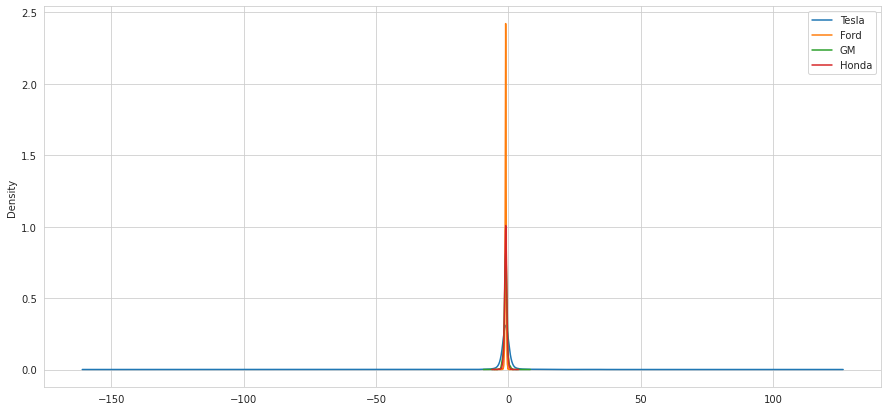

In [184]:
tesla['return'].plot(kind='kde', label='Tesla', figsize=(15,7))
ford['return'].plot(kind='kde', label='Ford')
gm['return'].plot(kind='kde', label='GM')
honda['return'].plot(kind='kde', label='Honda')
plt.legend()
plt.show()

##Boxplot

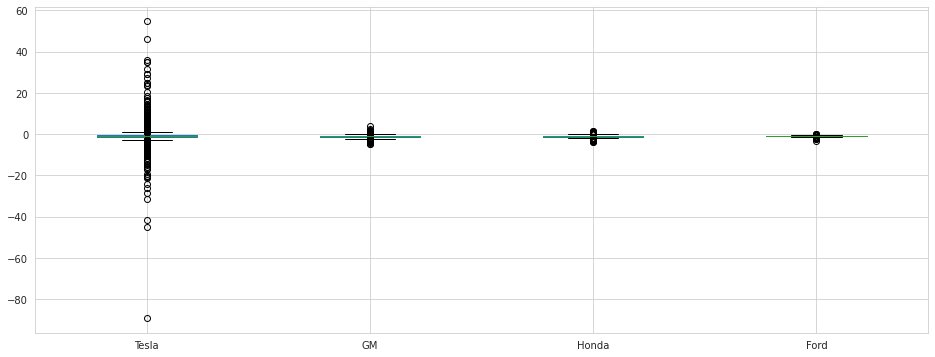

In [185]:
box_df=pd.concat([tesla['return'], gm['return'], honda['return'],ford['return']], axis=1)
box_df.columns=['Tesla', 'GM', 'Honda', 'Ford']
box_df.plot(kind='box', figsize=(16,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f914935d550>,
      dtype=object)

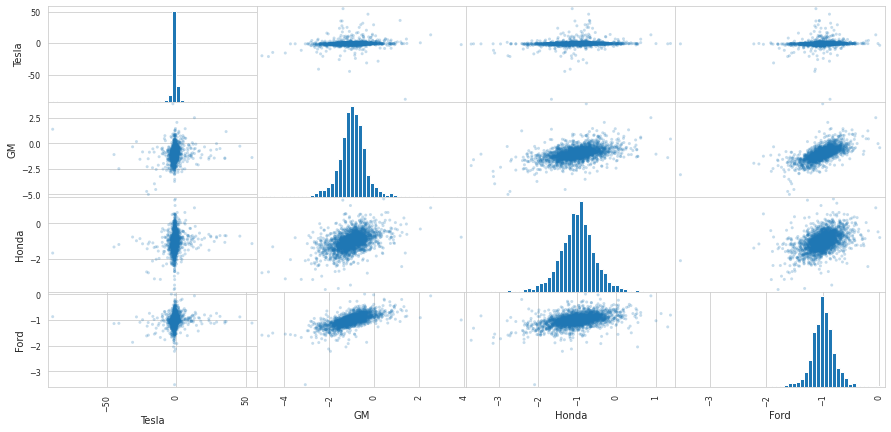

In [186]:
scatter_matrix(box_df, figsize=(15,7), hist_kwds={'bins':50}, alpha=0.25)

## Cumulative Return


In [187]:
tesla['Cumulative Return'] = (1 + tesla['return']).cumprod()
ford['Cumulative Return'] = (1 + ford['return']).cumprod()
gm['Cumulative Return'] = (1 + gm['return']).cumprod()
honda['Cumulative Return'] = (1 + honda['return']).cumprod()

Text(0.5, 1.0, 'Cumulative Return VS Time')

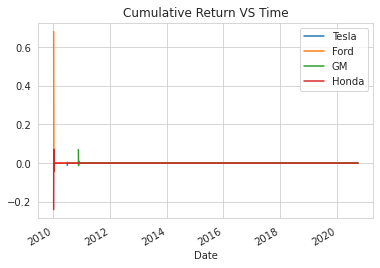

In [188]:
tesla['Cumulative Return'].plot(label='Tesla')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
honda['Cumulative Return'].plot(label='Honda')
plt.legend()
plt.title('Cumulative Return VS Time')